In [ ]:
%matplotlib inline

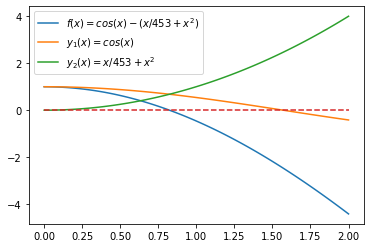

In [ ]:
from numpy import linspace
from numpy import sqrt, exp, cos, sin
from matplotlib.pyplot import plot,legend

import inspect, re

fx = lambda x:cos(x)-(x/453+x**2)

x = linspace(0,2,100)
plot(x,fx(x),label='$f(x) = cos(x)-(x/453+x^2)$');
plot(x,cos(x),label='$y_1(x) = cos(x)$');
plot(x,x/453+x**2,label='$y_2(x) = x/453+x^2$');
plot(x,fx(x)*0,'--');
legend();

Ao analisar o gráfico percebe-se que existe uma raiz entre os intervalos de 0.8 e 0.9. Para constatar irei plotar esses pontos, onde é percepitivel uma troca de sinais logo existe raiz entre esse intervalo.

In [ ]:
fx(0.8)

0.054940704932154194

In [ ]:
fx(0.9)

-0.19037678669622304

Sendo assim temos como parametros os seguintes dados, lembrando que a, b, x0, e x1 foram passados diretamente na chamada dos métodos aplicados abaixo.

In [ ]:
#Parametros
f = 'cos(x)-(x/453+x**2)'  # funcao
df = '-sin(x)-2*x-(1/453)' # derivada da funcao
tol = 10**-6               # tolerancia
nmax = 25                  # numero maximo de iteracoes
var = 'x'
plotar = True


##A) Método da Bisecção
É um método de busca de raízes que bissecta repetidamente um intervalo e então seleciona um subintervalo contendo a raiz para processamento adicional. Trata-se de um método simples e robusto, é usado frequentemente para obter uma primeira aproximação de uma solução, a qual é então utilizada como ponto inicial para métodos que convergem mais rapidamente.

In [ ]:
def bissecao(f,a,b,tol,N,var,plotar):
        
    # TODO identificar a variável usada na função 
    #      Aqui, tentei assumir que apenas uma era usada (e.g. 'x'),
    #      mas foi complicado generalizar quando há objeto numpy
    #var = re.search('[a-zA-Z]+',f)
    #var = var.group()

    # cria função anônima
    f = eval('lambda ' + var + ' :' + f)

    # Se função não for de uma variável, lança erro.
    # Mais aplicável se o caso geral fosse implementado.        
    if len(inspect.getfullargspec(f).args) - 1 > 0:    
        raise ValueError('O código é válido apenas para uma variável.')

    # calcula valor da função nos extremos
    fa = f(a) 
    fb = f(b)
    
    # verifica sinal da função para o intervalo passado     
    if fa*fb >= 0:
        raise ValueError('A função deve ter sinais opostos em a e b!')
    
    # flag usada para prevenir a obtenção da raiz 
    # antes de o intervalo ter sido 
    # suficientemente reduzido
    done = 0;

    # loop principal

    # bisecta o intervalo
    xm = (a+b)/2

    i = 1 # contador 

    while abs(a-b) > tol and ( not done or N != 0 ):
    # avalia a função no ponto médio
        fxm = f(xm)
        print("(i = {0:d}) f(xm)={1:f} | f(a)={2:f} | f(b)={3:f}".format(i,fxm,fa,fb))
   
        if fa*fxm < 0:       # Raiz esta à esquerda de xm
            b = xm
            fb = fxm
            xm = (a+b)/2
        elif fxm*fb < 0:     # Raiz esta à direita de xm
            a = xm
            fa = fxm
            xm = (a+b)/2
        else:               # Achamos a raiz
            done = 1
    
        N -= 1              # Atualiza passo
        i += 1              # Atualiza contador
            
    print("Solução encontrada: {0}".format(xm))

    # plotagem
    if plotar:        
        delta = 1*x
        dom = linspace(x-delta,x+delta,30)
        plot(dom,f(dom),x,f(x),'ro')

    return xm

f(x) = cos(x)-(x/453+x**2)

(i = 1) f(xm)=-0.064393 | f(a)=0.054941 | f(b)=-0.190377
(i = 2) f(xm)=-0.003889 | f(a)=0.054941 | f(b)=-0.064393
(i = 3) f(xm)=0.025736 | f(a)=0.054941 | f(b)=-0.003889
(i = 4) f(xm)=0.010976 | f(a)=0.025736 | f(b)=-0.003889
(i = 5) f(xm)=0.003556 | f(a)=0.010976 | f(b)=-0.003889
(i = 6) f(xm)=-0.000163 | f(a)=0.003556 | f(b)=-0.003889
(i = 7) f(xm)=0.001697 | f(a)=0.003556 | f(b)=-0.000163
(i = 8) f(xm)=0.000767 | f(a)=0.001697 | f(b)=-0.000163
(i = 9) f(xm)=0.000302 | f(a)=0.000767 | f(b)=-0.000163
(i = 10) f(xm)=0.000069 | f(a)=0.000302 | f(b)=-0.000163
(i = 11) f(xm)=-0.000047 | f(a)=0.000069 | f(b)=-0.000163
(i = 12) f(xm)=0.000011 | f(a)=0.000069 | f(b)=-0.000047
(i = 13) f(xm)=-0.000018 | f(a)=0.000011 | f(b)=-0.000047
(i = 14) f(xm)=-0.000003 | f(a)=0.000011 | f(b)=-0.000018
(i = 15) f(xm)=0.000004 | f(a)=0.000011 | f(b)=-0.000003
(i = 16) f(xm)=0.000000 | f(a)=0.000004 | f(b)=-0.000003
(i = 17) f(xm)=-0.000001 | f(a)=0.000000 | f(b)=-0.000003
Soluç

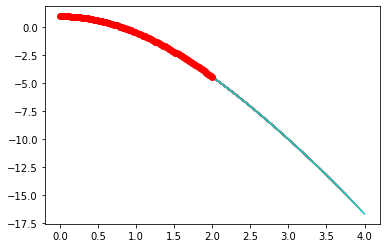

In [ ]:
print('f(x) = ' + f + '\n')

# resolve bisseção
mb = bissecao(f, 0.8, 0.9, tol, nmax, var,plotar)

##B) Método da posição 
De forma geral, o método consiste na utilização de pares [a,b] de aproximações que englobam a raiz nesse intervalo.

In [ ]:
def posicaofalsa(f,a,b,tol,N,var,plotar):
    
    # cria função anônima
    f = eval('lambda ' + var + ' :' + f)

    # Se função não for de uma variável, lança erro.
    # Mais aplicável se o caso geral fosse implementado.        
    if len(inspect.getfullargspec(f).args) - 1 > 0:    
        raise ValueError('O código é válido apenas para uma variável.')

    # calcula valor da função nos extremos
    fa = f(a) 
    fb = f(b)
    
    # verifica sinal da função para o intervalo passado     
    if fa*fb >= 0:
        raise ValueError('A função deve ter sinais opostos em a e b!')
    
    # flag usada para prevenir a obtenção da raiz 
    # antes de o intervalo ter sido 
    # suficientemente reduzido
    done = 0;

    # loop principal

    # calcula posicao
    xp = (a*f(b) - b*f(a))/(f(b) - f(a))

    i = 1 # contador 

    while abs(a-b) > tol and ( not done or N != 0 ):
        fxp = f(xp)
        print("(i = {0:d}) f(xm)={1:f} | f(a)={2:f} | f(b)={3:f}".format(i,fxp,fa,fb))
   
        if fa*fxp < 0:       # Raiz esta à esquerda de xm
            b = xp
            fb = fxp
            xp = (a*f(b) - b*f(a))/(f(b) - f(a))
        elif fxp*fb < 0:     # Raiz esta à direita de xm
            a = xp
            fa = fxp
            xp = (a*f(b) - b*f(a))/(f(b) - f(a))
        else:               # Achamos a raiz
            done = 1
    
        N -= 1              # Atualiza passo
        i += 1              # Atualiza contador
            
    print("Solução encontrada: {0}".format(xp))

    # plotagem
    if plotar:        
        delta = 1*x
        dom = linspace(x-delta,x+delta,30)
        plot(dom,f(dom),x,f(x),'ro')

    return xp

f(x) = cos(x)-(x/453+x**2)

(i = 1) f(xm)=0.002317 | f(a)=0.054941 | f(b)=-0.190377
(i = 2) f(xm)=0.000095 | f(a)=0.002317 | f(b)=-0.190377
(i = 3) f(xm)=0.000004 | f(a)=0.000095 | f(b)=-0.190377
(i = 4) f(xm)=0.000000 | f(a)=0.000004 | f(b)=-0.190377
(i = 5) f(xm)=0.000000 | f(a)=0.000000 | f(b)=-0.190377
(i = 6) f(xm)=0.000000 | f(a)=0.000000 | f(b)=-0.190377
(i = 7) f(xm)=0.000000 | f(a)=0.000000 | f(b)=-0.190377
(i = 8) f(xm)=0.000000 | f(a)=0.000000 | f(b)=-0.190377
(i = 9) f(xm)=0.000000 | f(a)=0.000000 | f(b)=-0.190377
(i = 10) f(xm)=0.000000 | f(a)=0.000000 | f(b)=-0.190377
(i = 11) f(xm)=0.000000 | f(a)=0.000000 | f(b)=-0.190377
(i = 12) f(xm)=-0.000000 | f(a)=0.000000 | f(b)=-0.190377
Solução encontrada: 0.8233690034494208


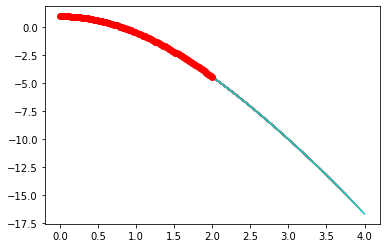

In [ ]:
print('f(x) = ' + f + '\n')

# resolve posicao
mp = posicaofalsa(f, 0.8, 0.9, tol, nmax, var,plotar)

##C) Método de Newton - Raphson
O método tem o objetivo de estimar as raízes de uma função. O primeiro passo é escolher uma aproximação inicial. Após isso, calcula-se a equação da reta tangente (por meio da derivada) da função nesse ponto e a interseção dela com o eixo das abcissas, a fim de encontrar uma melhor aproximação para a raiz. Repetindo-se o processo, cria-se um método iterativo para encontrarmos a raiz da função.

In [ ]:
# Método de Newton

def newton(x0,f,df,tol,nmax,var,plotar):

    f = eval('lambda x:' + f)
    df = eval('lambda x:' + df)

    it = 0 # contador de iteracoes

    # imprime estimativa inicial
    print('Estimativa inicial: x0 = {0}\n'.format(x0))  

    # Loop 
    for i in range(0,nmax):
        
        x = x0 - f(x0)/df(x0) # funcao de iteracao 
        
        e = abs(x-x0)/abs(x) # erro
        
        # tabela
        print('{0:d}  {1:f}  {2:f}  {3:f}  {4:e}'.format(i,x,f(x),df(x),e))
        
        if e < tol:
            break
        x0 = x                
        
    if i == nmax:
        print('Solução não obtida em {0:d} iterações'.format(nmax))
    else:
        print('Solução obtida: x = {0:.10f}'.format(x))

    # plotagem
    if plotar:        
        delta = 1*x
        dom = linspace(x-delta,x+delta,30)
        plot(dom,f(dom),x,f(x),'ro')

    return x

Estimativa inicial: x0 = 0.75

0  0.826715  -0.007986  -2.391347  9.279471e-02
1  0.823375  -0.000015  -2.382402  4.055851e-03
2  0.823369  -0.000000  -2.382386  7.612882e-06
3  0.823369  -0.000000  -2.382386  2.683769e-11
Solução obtida: x = 0.8233690034


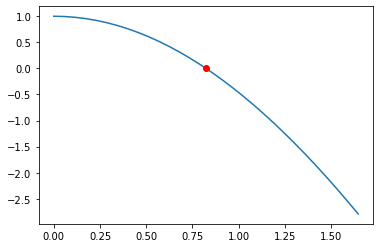

In [ ]:
x0 = 0.75 # estimativa inicial

# chamada da função
mn = newton(x0,f,df,tol,nmax,var,plotar)

##D) Método da secante
O método das secantes é um algoritmo de busca de raízes que usa uma sequência de raízes de linhas secantes para aproximar cada vez melhor a raiz de uma função f.

In [ ]:
# Método da Secante

def secante(xa,xb,f,tol,nmax,var,plotar):

    f = eval('lambda x:' + f)

    # imprime estimativas iniciais
    print('Estimativas iniciais: xa = {0}; xb = {1} \n'.format(xa,xb))  

    # Loop 
    for i in range(0,nmax):
        
        x = (xa*f(xb) - xb*f(xa))/(f(xb) - f(xa))
                        
        e = abs(x-xb)/abs(x) # erro
        
        # tabela
        print('{0:d}  {1:f}  {2:f}  {3:e}'.format(i,x,f(x),e))
        
        if e < tol:
            break
        xa = xb
        xb = x
        
    if i == nmax:
        print('Solução não obtida em {0:d} iterações'.format(nmax))
    else:
        print('Solução obtida: x = {0:.10f}'.format(x))

    # plotagem
    if plotar:        
        delta = 1*x
        dom = linspace(x-delta,x+delta,30)
        plot(dom,f(dom),x,f(x),'ro')

    return x

Estimativas iniciais: xa = 0.8; xb = 0.9 

0  0.822396  0.002317  9.436363e-02
1  0.823329  0.000095  1.133552e-03
2  0.823369  -0.000000  4.856154e-05
3  0.823369  0.000000  2.658451e-08
Solução obtida: x = 0.8233690034


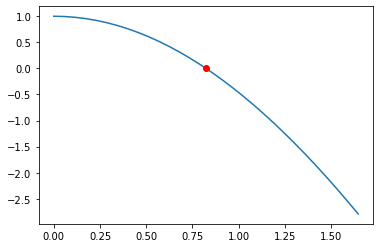

In [ ]:
# chamada da função
ms = secante(0.8,0.9,f,tol,nmax,var,plotar)

##E) Comparação entre os métodos
Percebe-se que o método de Newton - Raphson e o da secante obtveram melhores resuldados em menor número de iterações. Entretanto o de Newton - Raphson se destaca por apresentar um valor de raiz na ordem de grandeza de 10^-11.